# Boston House Price Prediction

## Introduction

This project aims to predict the median value of owner-occupied homes in Boston using the Boston Housing dataset. We will explore the dataset, perform data cleaning and preprocessing, and then build a linear regression model to predict house prices.

## Importing Necessary Libraries

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Loading

In [194]:
# Load the Boston Housing dataset from a CSV file
df = pd.read_csv('HousingData.csv')

## Data Overview

In [195]:
# Display the first few rows of the DataFrame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [196]:
# Get information about the DataFrame's columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [197]:
# Get descriptive statistics of the DataFrame
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [198]:
#Count null values in each column
df.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


## Exploratory Data Analysis

In [199]:
# Calculate the correlation between features and the target variable 'MEDV'
correlations = df.corr()['MEDV'].sort_values(ascending=False)
print(correlations)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


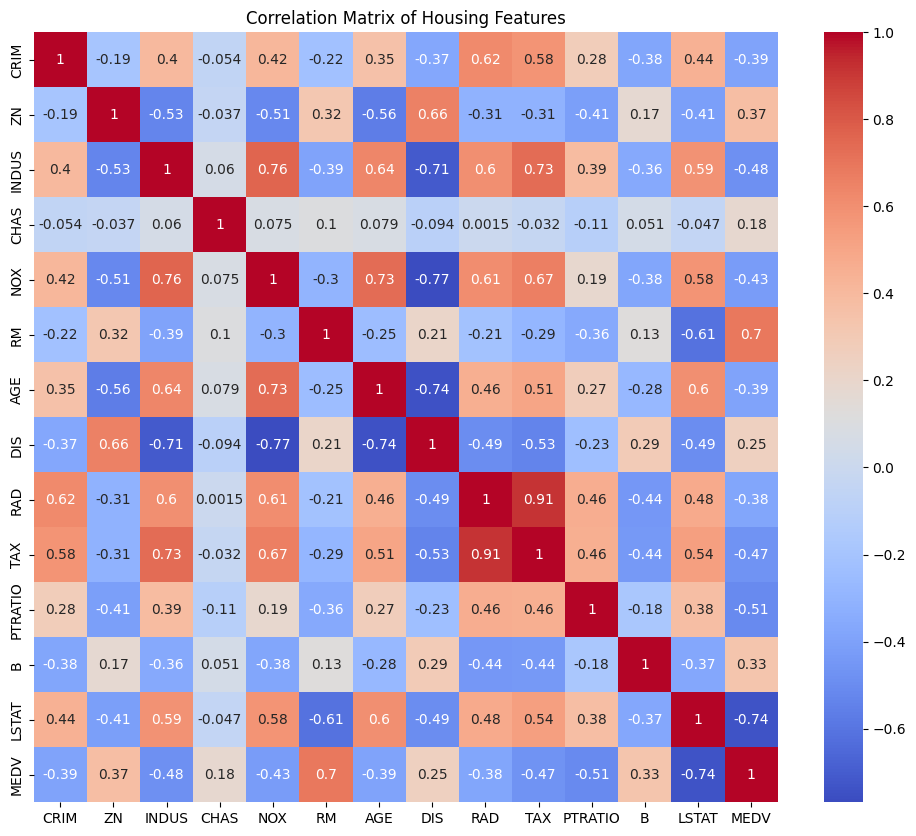

In [200]:
# Visualize the correlations using a heatmap
# This helps to identify potential relationships between features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Housing Features')
plt.show()

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

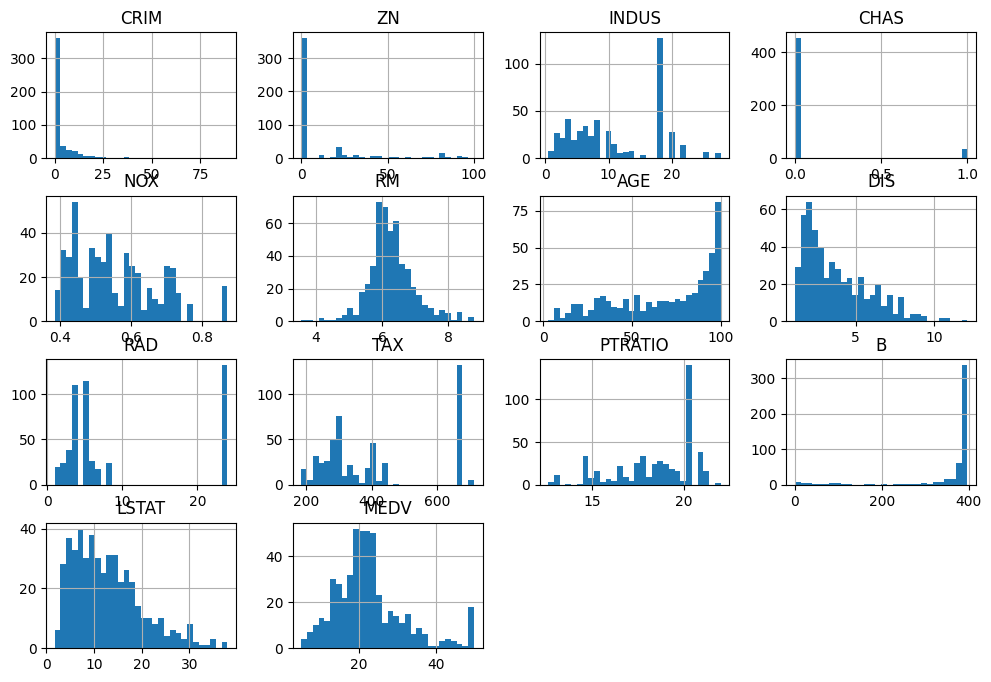

In [201]:
df.hist(bins=30, figsize=(12, 8))

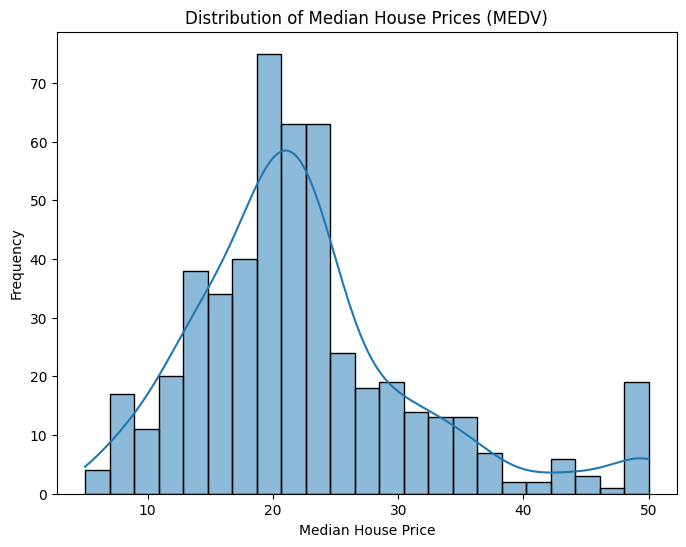

In [202]:
# Visualize the distribution of the target variable 'MEDV'
plt.figure(figsize=(8, 6))
sns.histplot(df['MEDV'], kde=True)
plt.title('Distribution of Median House Prices (MEDV)')
plt.xlabel('Median House Price')
plt.ylabel('Frequency')
plt.show()

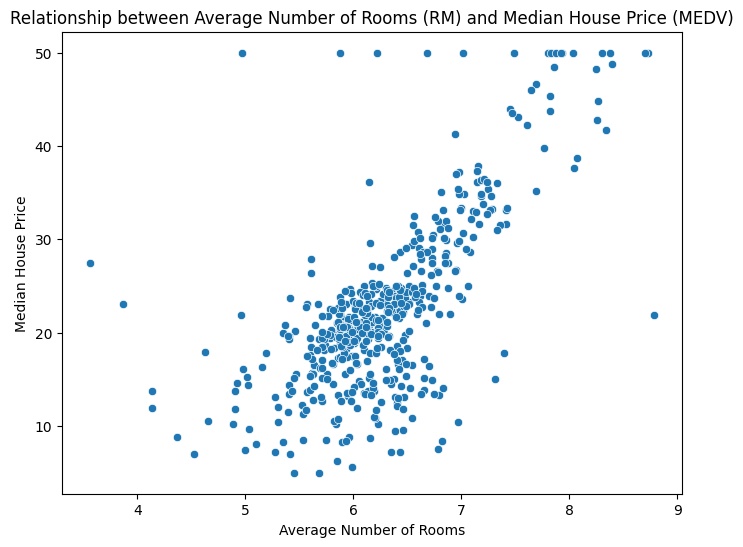

In [203]:
# Scatter plot of 'RM' vs 'MEDV'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title('Relationship between Average Number of Rooms (RM) and Median House Price (MEDV)')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Price')
plt.show()

## Data Preprocessing

In [204]:
#filling the missing values with medain since it was heavily skewed
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].median())
df['ZN'] = df['ZN'].fillna(df['ZN'].median())

#filling the null values with mode since its a discrete variable
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mode().iloc[0])

#filling the missing values with mean as they are not heavily skewed
df['INDUS'] = df['INDUS'].fillna(df['ZN'].mean())
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['LSTAT'] = df['LSTAT'].fillna(df['AGE'].mean())

In [205]:
# Drop unnesccary columns
columns_to_drop = ['B']
df = df.drop(columns=columns_to_drop)

In [206]:
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [207]:
#skew before transformation
df.skew()

,0
CRIM,5.316109
ZN,2.324603
INDUS,0.315429
CHAS,3.467800
NOX,0.729308
RM,0.403612
AGE,-0.594261
DIS,1.011781
RAD,1.004815
TAX,0.669956


In [208]:
#transforming the columns having high skewness

#implementing box-cox transformation since this works well if values are strictly positive > 0 and adjusts skewness dynamically
df['CRIM'], _ = boxcox(df['CRIM'] + 1)
df['LSTAT'], _ = boxcox(df['LSTAT'] + 1)

#using log transform since it has zero values which is not good for box-cox
df['ZN'] = np.log1p(df['ZN'])

In [209]:
#skew after transformation
df.skew()

,0
CRIM,0.636134
ZN,1.292990
INDUS,0.315429
CHAS,3.467800
NOX,0.729308
RM,0.403612
AGE,-0.594261
DIS,1.011781
RAD,1.004815
TAX,0.669956


## Model Building and Evaluation

In [210]:
X = df.drop('MEDV',axis = 1)
y = df['MEDV']

In [211]:
#scaling all the dependent variables so they have same range
from sklearn.preprocessing import StandardScaler

#not scaling the CHAS column since it has binary values
features_to_scale = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'LSTAT']

scaler = StandardScaler()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

In [212]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [213]:
# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared
mse_lr = mean_squared_error(y_test,y_pred_lr)
r2_lr = r2_score(y_test,y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")

Linear Regression - MSE: 26.4330, R²: 0.6396
